Pump Test Example __ Prof. Gretchen Miller, Texas A&M University

In [1]:
import csv ; import numpy as np ; import matplotlib.pyplot as plt ; from pathlib import Path ; import pandas as pd
output_folder = Path("./output_Theis_02")     ; output_folder.mkdir(exist_ok=True)

In [2]:
Q = 8176.49  ; Q = Q/(24*60) ; r = 91.44 
with open('E:\\15_REPOS\\00_BETAMI\\bin\\Pump\\well_test_data.csv',newline='') as csvfile:
    datain = csv.reader(csvfile,quoting = csv.QUOTE_NONNUMERIC)  ;   data = np.array(list(datain))   

time = data[:,0]   ; s_meas = data[:,1] #measured drawdown data
df1 = pd.DataFrame(time)  ; df2 = pd.DataFrame(s_meas) ; pe = pd.concat([df1, df2], axis=1)  ; pe.columns = ["(sec)", "(meters)"]
pe.to_csv(output_folder/ 'a_pe.csv') 

T = 500 ; S = 0.001 ; T = T/(24*60)  
uvalues = ((r**2)*S) / (4*T*time) ; print(uvalues)

[6.02011699e+00 3.01005850e+00 2.00670566e+00 1.50502925e+00
 1.00335283e+00 7.52514624e-01 6.02011699e-01 2.00670566e-01
 1.50502925e-01 1.20402340e-01 1.00335283e-01 7.52514624e-02
 6.02011699e-02 3.01005850e-02 1.50502925e-02 1.00335283e-02
 7.52514624e-03 6.02011699e-03 4.18063680e-03]


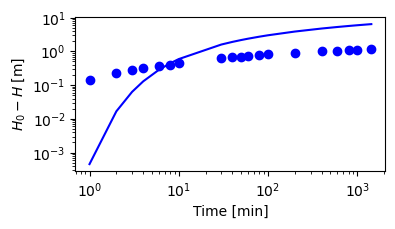

In [3]:
import well_fxn_script as wf         # type: ignore
tol = 1e-7    ;  s_mod = list(map(lambda uvalues: wf.well_fxn(uvalues,tol) * Q / ( 4*T*np.pi ), uvalues ))   # wu ... wf
plt.figure(figsize=(4, 2)) ; plt.loglog(time, s_mod,'b-',time, s_meas,'bo', ) ; plt.xlabel('Time [min]')   ; plt.ylabel('$H_0-H$ [m]') ; plt.show()

### <font color='blue'> **$SS = \sum_{i=1}^{n} (s'_{mod}-s'_{meas})^2 $** </font>

In [4]:
SS = np.sum(np.square(s_mod - s_meas))   ; print(SS)

127.55914389825942


In [5]:
from scipy.optimize import curve_fit

def func(t,Tcalc,Scalc):
    tol = 1e-6             ; a = len(t)   ;  s_mod_fit    = np.zeros(a)
    for i in range(0, a):    u = ((r**2)*Scalc)/(4*Tcalc*t[i])  ;  s_mod_fit[i] = wf.well_fxn(u,tol) * Q / ( 4*Tcalc*np.pi )
    return s_mod_fit

[T_final,S_final], junk = curve_fit(func, time, s_meas, p0=([T,S]), bounds=(0, np.inf))

print('T = ', T_final)  ; print('S = ', S_final)

T =  3.091927657825759
S =  0.0003924344927547226


In [6]:
uvalues_final = ( (r**2)*S_final ) / (4*T_final*time)
s_mod_final = list(map(lambda uvalues_final: wf.well_fxn(uvalues_final,tol) * Q / (4*T_final*np.pi), uvalues_final))
SS = np.sum(np.square(s_meas - s_mod_final))  ; print('SS =',SS)

SS = 0.0035824512691457595


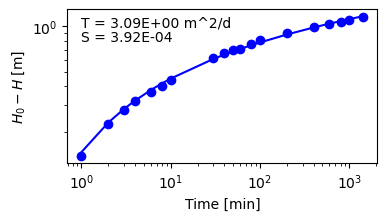

In [7]:
plt.figure(figsize=(4, 2))
plt.loglog(time, s_mod_final,'b-',time, s_meas,'bo', )    ; plt.xlabel('Time [min]')  ; plt.ylabel('$H_0-H$ [m]')
Tstring = "T = "+format(T_final,'.2E') +" m^2/d"          ; Sstring = "S = " + format(S_final,'.2E')
plt.annotate(Tstring, xy=(1, 1)) ; plt.annotate(Sstring, xy=(1,0.8)) ; plt.show()